# Zomato Restaurant Project

### Problem Statement:

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

In [1]:
# Importing all Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Zomato Restaurant Project.csv")

In [3]:
code = pd.read_excel('Country-Code.xlsx')

In [4]:
code

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [5]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,stanbul,"Kemanke Karamustafa Pa a Mahallesi, R۱ht۱m ...",Karak _y,"Karak _y, stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A ac۱,208,stanbul,"Ko uyolu Mahallesi, Muhittin st _nda Cadd...",Ko uyolu,"Ko uyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,stanbul,"Kuru _e me Mahallesi, Muallim Naci Caddesi, N...",Kuru _e me,"Kuru _e me, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A k Kahve,208,stanbul,"Kuru _e me Mahallesi, Muallim Naci Caddesi, N...",Kuru _e me,"Kuru _e me, stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [6]:
df = pd.merge(data,code,on = 'Country Code', how='left')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,stanbul,"Kemanke Karamustafa Pa a Mahallesi, R۱ht۱m ...",Karak _y,"Karak _y, stanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz A ac۱,208,stanbul,"Ko uyolu Mahallesi, Muhittin st _nda Cadd...",Ko uyolu,"Ko uyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,stanbul,"Kuru _e me Mahallesi, Muallim Naci Caddesi, N...",Kuru _e me,"Kuru _e me, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,A k Kahve,208,stanbul,"Kuru _e me Mahallesi, Muallim Naci Caddesi, N...",Kuru _e me,"Kuru _e me, stanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the
following variables:
    
• Restaurant Id: Unique id of every restaurant across various cities of the world
    
• Restaurant Name: Name of the restaurant
    
• Country Code: Country in which restaurant is located
    
• City: City in which restaurant is located
    
• Address: Address of the restaurant
    
• Locality: Location in the city
    
• Locality Verbose: Detailed description of the locality
    
• Longitude: Longitude coordinate of the restaurant&#39;s location
    
• Latitude: Latitude coordinate of the restaurant&#39;s location
    
• Cuisines: Cuisines offered by the restaurant
    
• Average Cost for two: Cost for two people in different currencies
    
• Currency: Currency of the country
    
• Has Table booking: yes/no
    
• Has Online delivery: yes/ no
    
• Is delivering: yes/ no
• Switch to order menu: yes/no
    
• Price range: range of price of food
    
• Aggregate Rating: Average rating out of 5
    
• Rating color: depending upon the average rating color
    
• Rating text: text on the basis of rating of rating
    
• Votes: Number of ratings casted by people


In [7]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

There is only one column which has some null values which we can process it easily later.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

There are many columns with Dtypes as "Object" , we will need Lable Encoder later to process this .

# EDA

In [9]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

We have a column with only one unique Value hence it will not be of any use in Model training.
We also have a column with no use of us i.e. "Restaurant ID"

So we will have to Drop this two columns later.

<AxesSubplot:title={'center':'Ratings'}, xlabel='Rating text', ylabel='count'>

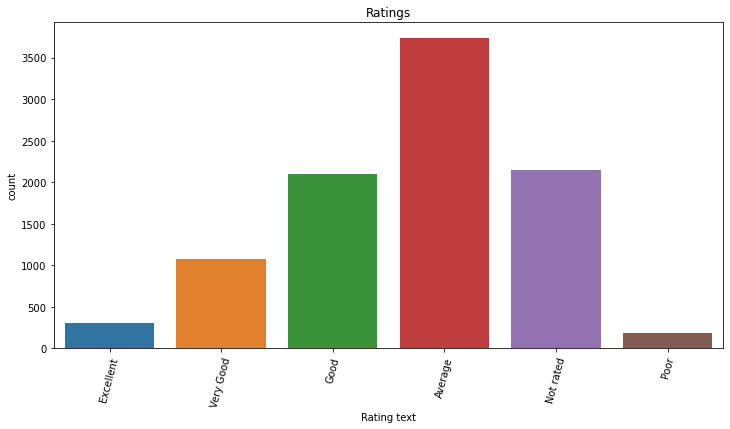

In [10]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Ratings')
sns.countplot(x='Rating text', data=df)

As we can see most of the Ratings are "Average" and ratings such as "Poor" and "Excellent" are very low .

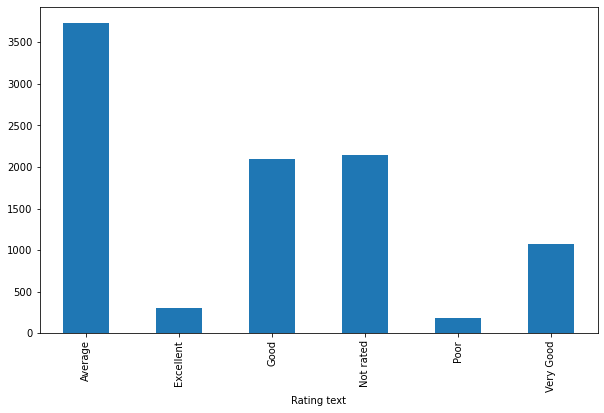

In [11]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('Rating text').Currency.count().plot.bar(ylim=0)
plt.show()

[Text(0, 0, 'Excellent'), Text(1, 0, 'Very Good'), Text(2, 0, 'Good'), Text(3, 0, 'Average'), Text(4, 0, 'Not rated'), Text(5, 0, 'Poor')]


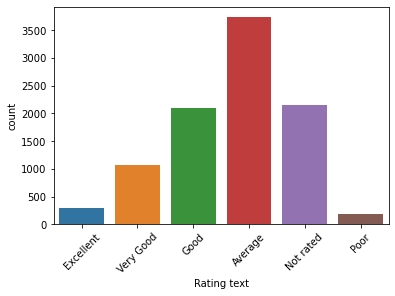

In [12]:
#data.rates.nunique()
chart=sns.countplot(x=df['Rating text'])
print(chart.set_xticklabels(chart.get_xticklabels(), rotation=45))

<AxesSubplot:title={'center':'Price Range'}, xlabel='Price range', ylabel='count'>

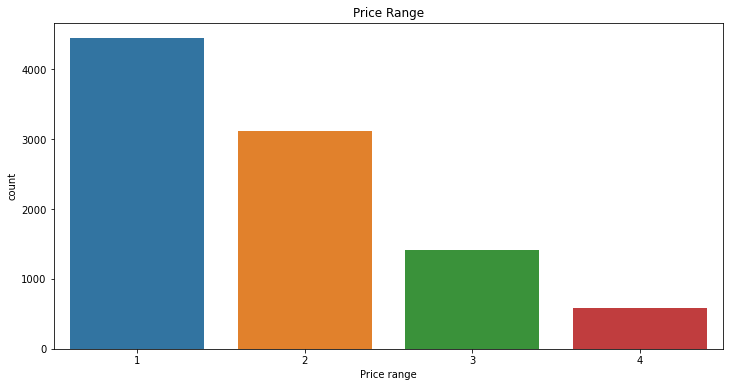

In [13]:
plt.figure(figsize=(12,6))
plt.title('Price Range')
sns.countplot(x='Price range', data=df)

Most of the Resturants have Price Range in "1" and price range of "4" is the Lowest in Resturents .

In [14]:
df['Aggregate rating'].value_counts()

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64

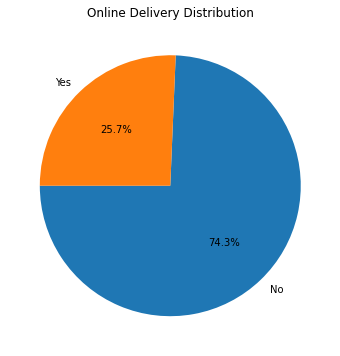

In [15]:
plt.figure(figsize=(12,6))
plt.title('Online Delivery Distribution')
plt.pie(df['Has Online delivery'].value_counts()/9551*100, labels=df['Has Online delivery'].value_counts().index, autopct='%1.1f%%', startangle=180);

Only 1/4th of the Resturents are providing with Online Delivery.

In [16]:
df['City'].value_counts()

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64

Data has most of it's source from New Delhi .

Text(0.5, 1.0, 'Resturants Listing on Zomato')

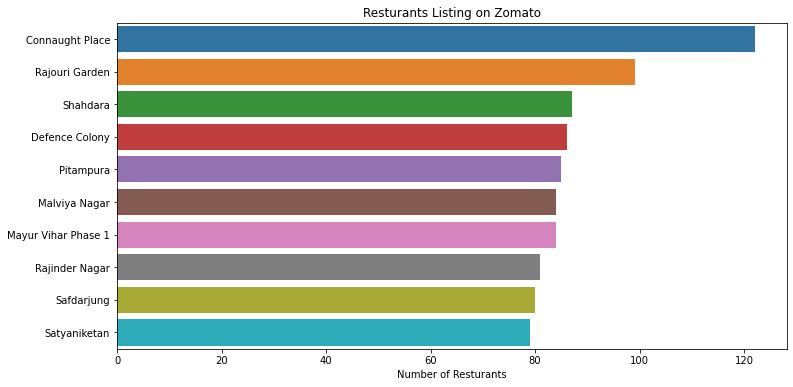

In [17]:
Delhi = df[(df.City == 'New Delhi')]
plt.figure(figsize=(12,6))
sns.barplot(x=Delhi.Locality.value_counts().head(10), y=Delhi.Locality.value_counts().head(10).index)

plt.ylabel(None)
plt.xlabel('Number of Resturants')
plt.title('Resturants Listing on Zomato')

Connaught place seems to have high no of resturatants registered with Zomato in Delhi . And Most of the Data is also Based on Delhi as well hence Connaught place has overall most Resturants in the the whole data.

In [18]:
df['Average Cost for two'].value_counts()

500       900
300       897
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: Average Cost for two, Length: 140, dtype: int64

<AxesSubplot:xlabel='Rating text', ylabel='Average Cost for two'>

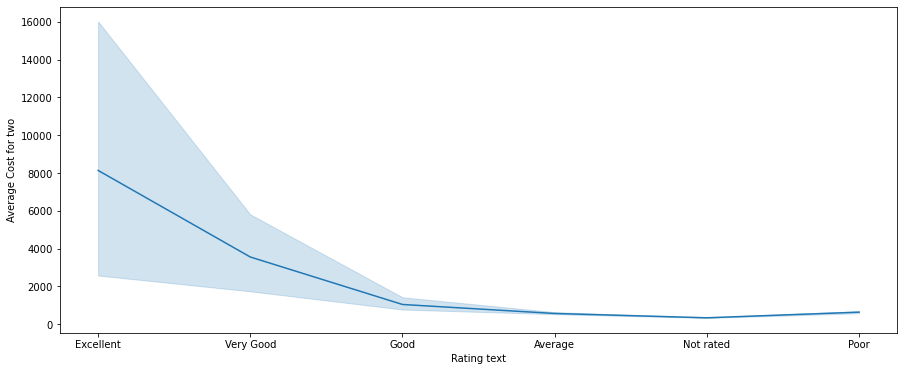

In [19]:
plt.figure(figsize=(15,6))
sns.lineplot(x=df['Rating text'],y=df['Average Cost for two'])

Average Cost for Dinning for Resturants with High rating are more Costly as compared to Resturants with low Costs.

<AxesSubplot:xlabel='Country', ylabel='Aggregate rating'>

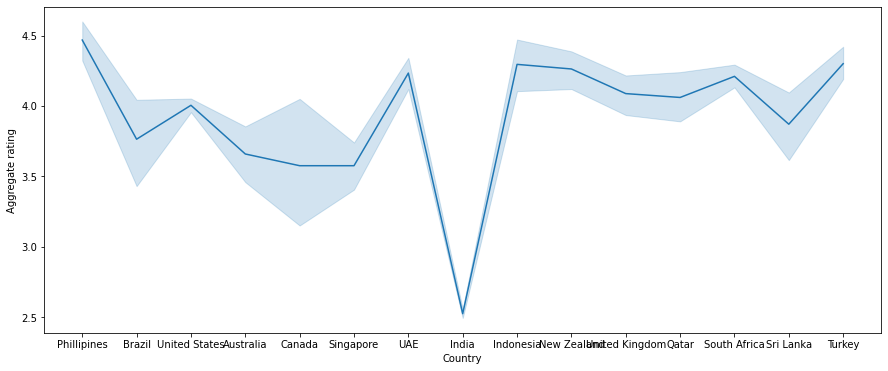

In [20]:
plt.figure(figsize=(15,6))
sns.lineplot(y=df['Aggregate rating'],x=df['Country'])

Average Rating for Resturants in India is Lowest than in any other Country. But Due to most of the Zomateo Restursnts being in India this might affect this graph.

In [21]:
df['Cuisines'].value_counts()

North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

As most of the Resturants are from New Delhi , we can also see that most of the Cuisines are North Indian.

<AxesSubplot:xlabel='Cuisines', ylabel='Aggregate rating'>

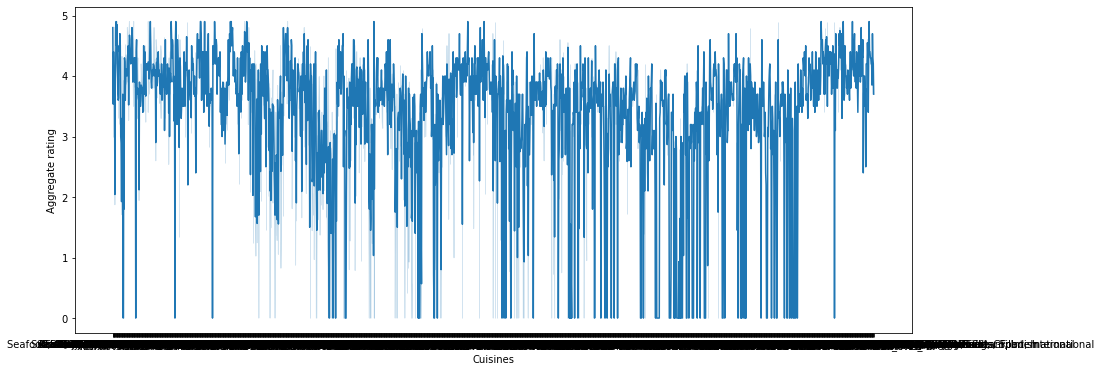

In [22]:
plt.figure(figsize=(15,6))
sns.lineplot(y=df['Aggregate rating'],x=df['Cuisines'])

In [23]:
df.Cuisines.count

<bound method Series.count of 0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object>

There are also most Cafe in Cuisines as we can see .

Text(0.5, 1.0, 'Resturants Online Delivery')

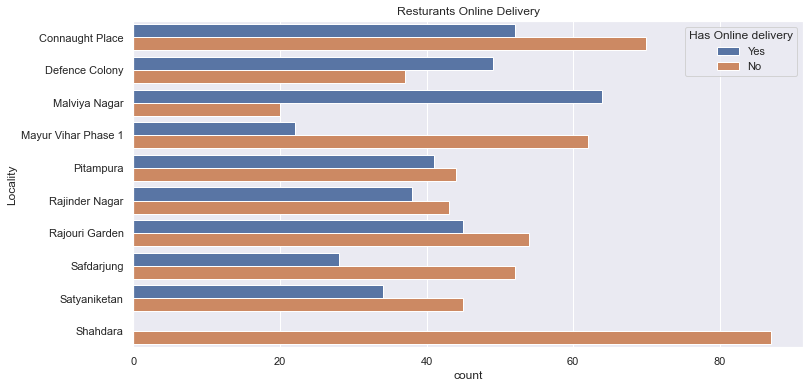

In [24]:
top_locality = Delhi.Locality.value_counts().head(10)
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,6))
ax = sns.countplot(y= "Locality", hue="Has Online delivery", data=Delhi[Delhi.Locality.isin(top_locality.index)])
plt.title('Resturants Online Delivery')

There are most Resturants who does not provide Online Delivery in most of the places except in "Malviya Nagar"

Text(0.5, 1.0, 'Rating vs Cost of Two')

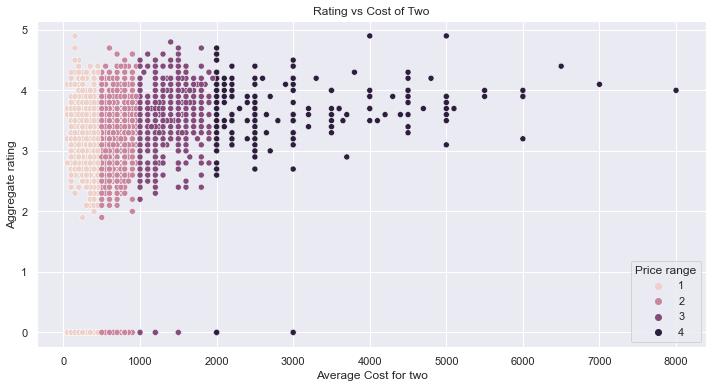

In [25]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Average Cost for two", y="Aggregate rating", hue='Price range', data=Delhi)

plt.xlabel("Average Cost for two")
plt.ylabel("Aggregate rating")
plt.title('Rating vs Cost of Two')

 As we can see Average Cost for Dinning for Resturants with High rating are more Costly as compared to Resturants with low Costs. Any Resturants with Price Range of "4" has Average Rating in Higher Brackets. And as the Cost Increases the Ratings also incereases as well .

In [26]:
df.shape

(9551, 22)

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


# Data Preprocessing

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

le=LabelEncoder

In [29]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

There are many columns with Yes/No columns so Data Processing is needed here also on many other columns amoung them.

There is one column with some NaN values and lets replace NaNs with the mode of the column where it is located using mode() on "Cuisines" column 

In [34]:
df['Cuisines'].value_counts()

North Indian                                             945
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

In [31]:
df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace=True)

Replacing the Columns with Yes\No options to Binary i.e. 0/1 .

In [32]:
df['Has Online delivery'].replace({'No': 0, 'Yes': 1}, inplace = True)
df['Has Table booking'].replace({'No': 0, 'Yes': 1}, inplace = True)
df['Is delivering now'].replace({'No': 0, 'Yes': 1}, inplace = True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   int64  
 13  Has Online delivery   9551 non-null   int64  
 14  Is delivering now     9551 non-null   int64  
 15  Switch to order menu 

In [35]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

Categorical features need to be converted to numbers so that they can be included in calculations done by a machine learning model. The categorical variables in our data set are not ordinal (i.e. there is no order in them)

In [36]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

We have to Lable Encode "Currency" , "Locality" , "Cuisines" , "Country" , "City" columns as it is very much required in our data .

In [37]:
df['Currency'] = le.fit_transform(df['Currency'])

In [38]:
df['Locality'] = le.fit_transform(df['Locality'])

In [39]:
df['Cuisines'] = le.fit_transform(df['Cuisines'])

In [40]:
df['Country'] = le.fit_transform(df['Country'])

In [41]:
df['City'] = le.fit_transform(df['City'])

We have to Drop some Columns which are not required that are "Restaurant ID" , 'Restaurant Name','Address','Locality Verbose','Longitude','Latitude','Switch to order menu','Rating color','Rating text' .

In [42]:
df=df.drop(['Restaurant ID','Restaurant Name','Address','Locality Verbose','Longitude','Latitude','Switch to order menu','Rating color','Rating text'], axis=1)

In [43]:
df

,Country Code,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Country
0,162,74,175,920,1100,0,1,0,0,3,4.8,314,6
1,162,74,597,1111,1200,0,1,0,0,3,4.5,591,6
2,162,76,312,1671,4000,0,1,0,0,4,4.4,270,6
3,162,76,866,1126,1500,0,0,0,0,4,4.9,365,6
4,162,76,866,1122,1500,0,1,0,0,4,4.8,229,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,208,0,522,1813,80,11,0,0,0,3,4.1,788,11
9547,208,0,547,1824,105,11,0,0,0,3,4.2,1034,11
9548,208,0,559,1110,170,11,0,0,0,4,3.7,661,11
9549,208,0,559,1657,120,11,0,0,0,4,4.0,901,11


<AxesSubplot:>

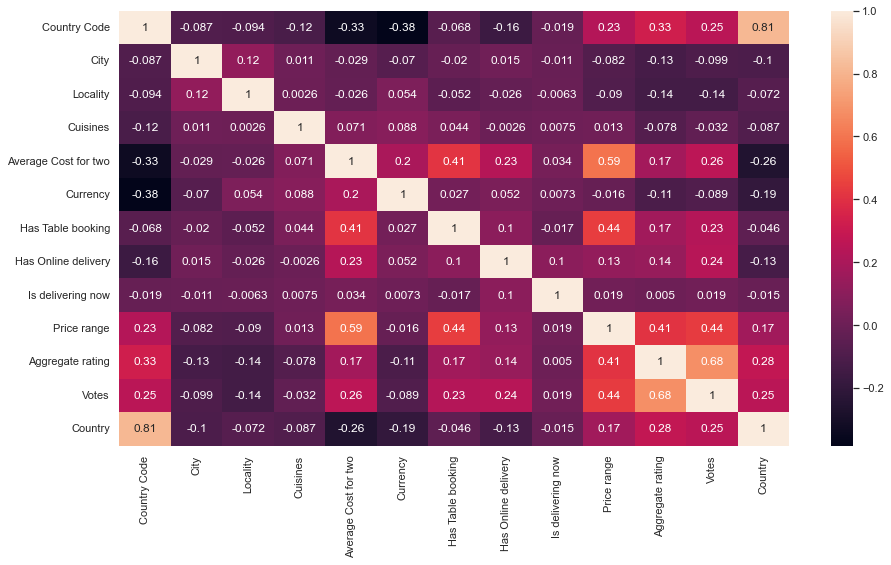

In [44]:
#Get Correlation between different variables
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [45]:
df.skew()

Country Code             3.043965
City                    -1.243427
Locality                -0.255567
Cuisines                -0.307440
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.889618
Aggregate rating        -0.954130
Votes                    8.807637
Country                  3.312721
dtype: float64

# Predicting Dataset with respect to "Price Range"

In [46]:
X=df.drop(['Price range'],axis=1)
y=df['Price range']

In [47]:
x=X

In [48]:
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)
x_train.head()
y_train.head()

7590    1
2907    1
5473    1
8056    2
8161    2
Name: Price range, dtype: int64

In [49]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

## Linear Regression Model

In [50]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

In [51]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4614890102264335

Linear Regression has only R^2 Score of only 46.15%

## Decision Tree Regression

In [52]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9783943600931122

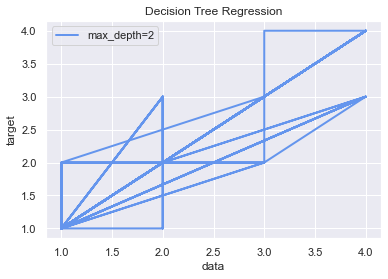

In [53]:
# Plot the results
plt.figure()
plt.plot(y_test, y_predict, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Decision Tree Regression has R^2 score of 97.84%

## Random Forest Regression

In [54]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9797790884313045

Random Forest Regression has R^2 score of 97.977 % .

## Extra Tree Regression

In [55]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(x_train,y_train)
y_predict=ETree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9767211939203229

Extra Tree Regression has R^2 score of 97.672 %.

### Predicting the Dataset with Target set as "Price Range" with Random Forest Regression has R^2 score of 97.977 %  as highest amongst other Model Predictions.

# Predicting Dataset with respect to "Average Cost for two"

In [56]:
X=df.drop(['Average Cost for two','Is delivering now'],axis=1)
y=df['Average Cost for two']

In [57]:
x=X

In [58]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [59]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(0,200):
    train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size = 0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y,pre)
        print("R2 score correspond to random state " ,r_state ,"is", r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score correspond to random state  0 is 0.4443418374704481
R2 score correspond to random state  0 is -0.050884973846035964
R2 score correspond to random state  0 is 0.46425445816665856
R2 score correspond to random state  0 is 0.03512891915527383
R2 score correspond to random state  0 is 0.507447236739643
R2 score correspond to random state  1 is 0.675952520225483
R2 score correspond to random state  1 is -0.0625481997657622
R2 score correspond to random state  1 is 0.3576929476489349
R2 score correspond to random state  1 is 0.0305763471865228
R2 score correspond to random state  1 is 0.5781820949197155
R2 score correspond to random state  2 is 0.8453284086477797
R2 score correspond to random state  2 is -2.14623914029069
R2 score correspond to random state  2 is -5.549695740868673
R2 score correspond to random state  2 is -0.13913707264837205
R2 score correspond to random state  2 is 0.39618649094492486
R2 score correspond to random state  3 is 0.6085540439409427
R2 score correspon

R2 score correspond to random state  26 is 0.3874211306879276
R2 score correspond to random state  26 is 0.04988556016075252
R2 score correspond to random state  26 is -0.0419563071829514
R2 score correspond to random state  27 is 0.3858119617304723
R2 score correspond to random state  27 is -0.1639859269470001
R2 score correspond to random state  27 is 0.5410167345725381
R2 score correspond to random state  27 is 0.03542178912642746
R2 score correspond to random state  27 is 0.3513116805452978
R2 score correspond to random state  28 is -0.6192555882034159
R2 score correspond to random state  28 is -0.45593037303277995
R2 score correspond to random state  28 is 0.29276376283423544
R2 score correspond to random state  28 is 0.05627290748839464
R2 score correspond to random state  28 is 0.6118861223991086
R2 score correspond to random state  29 is 0.07876864140594575
R2 score correspond to random state  29 is -0.7118359442083755
R2 score correspond to random state  29 is 0.68929546962544

R2 score correspond to random state  52 is -0.5495310870394774
R2 score correspond to random state  53 is 0.6301445027907642
R2 score correspond to random state  53 is -0.1791120166663107
R2 score correspond to random state  53 is 0.4717005876302256
R2 score correspond to random state  53 is 0.0301288332931251
R2 score correspond to random state  53 is 0.5107153349235583
R2 score correspond to random state  54 is 0.18280518388563138
R2 score correspond to random state  54 is -0.2239664058408537
R2 score correspond to random state  54 is 0.3729534528498717
R2 score correspond to random state  54 is 0.03916073900303263
R2 score correspond to random state  54 is 0.354660353637819
R2 score correspond to random state  55 is 0.6343286889187618
R2 score correspond to random state  55 is -0.2664858761240325
R2 score correspond to random state  55 is 0.4685936016266645
R2 score correspond to random state  55 is 0.024371436510851385
R2 score correspond to random state  55 is 0.47188614835032605


R2 score correspond to random state  79 is 0.7236282896658421
R2 score correspond to random state  79 is 0.04198514407399789
R2 score correspond to random state  79 is 0.7378033065568235
R2 score correspond to random state  80 is -0.04999897775898332
R2 score correspond to random state  80 is -0.1403363780028939
R2 score correspond to random state  80 is 0.5772069653618035
R2 score correspond to random state  80 is 0.025501468976934616
R2 score correspond to random state  80 is 0.48203271185285124
R2 score correspond to random state  81 is -0.3469704082164611
R2 score correspond to random state  81 is -0.81988164108761
R2 score correspond to random state  81 is 0.44172511794723657
R2 score correspond to random state  81 is 0.01696544138429068
R2 score correspond to random state  81 is 0.5630437728478002
R2 score correspond to random state  82 is -1.4515467851700796
R2 score correspond to random state  82 is -0.6377966692256183
R2 score correspond to random state  82 is 0.63303435733059

R2 score correspond to random state  105 is 0.6315652792474865
R2 score correspond to random state  105 is 0.04266376647180814
R2 score correspond to random state  105 is 0.4695331693742789
R2 score correspond to random state  106 is 0.6273162759826667
R2 score correspond to random state  106 is -0.19551892396829218
R2 score correspond to random state  106 is 0.44469592099405064
R2 score correspond to random state  106 is 0.04314821514249689
R2 score correspond to random state  106 is 0.5203787426702214
R2 score correspond to random state  107 is 0.438879453254854
R2 score correspond to random state  107 is -0.17025294028731253
R2 score correspond to random state  107 is 0.525576109386356
R2 score correspond to random state  107 is 0.030358272890480764
R2 score correspond to random state  107 is 0.507599862862834
R2 score correspond to random state  108 is 0.7882016896237994
R2 score correspond to random state  108 is -2.0711767140985917
R2 score correspond to random state  108 is -1.7

R2 score correspond to random state  131 is -0.38334307451627025
R2 score correspond to random state  131 is -0.014541271333328831
R2 score correspond to random state  131 is 0.8522713335736043
R2 score correspond to random state  132 is 0.28969895518583455
R2 score correspond to random state  132 is -0.34294198564214073
R2 score correspond to random state  132 is 0.5474566582225885
R2 score correspond to random state  132 is 0.03845225283515885
R2 score correspond to random state  132 is 0.43747787473509747
R2 score correspond to random state  133 is 0.3076954362178703
R2 score correspond to random state  133 is -0.19748591200734644
R2 score correspond to random state  133 is 0.3478816582912915
R2 score correspond to random state  133 is 0.02147940253599101
R2 score correspond to random state  133 is 0.4368869770993611
R2 score correspond to random state  134 is 0.6477464977389201
R2 score correspond to random state  134 is -1.5474756110355754
R2 score correspond to random state  134 

R2 score correspond to random state  157 is -1.4972497301996976
R2 score correspond to random state  157 is 0.03937214226022867
R2 score correspond to random state  157 is -0.2684490898936953
R2 score correspond to random state  158 is 0.3473637403271199
R2 score correspond to random state  158 is -0.19186186394960902
R2 score correspond to random state  158 is -1.2905736111514834
R2 score correspond to random state  158 is 0.03579340009761045
R2 score correspond to random state  158 is 0.432702978699548
R2 score correspond to random state  159 is -1.2889278945428542
R2 score correspond to random state  159 is -0.5026039441499197
R2 score correspond to random state  159 is -0.21785427399727975
R2 score correspond to random state  159 is 0.07361379130647616
R2 score correspond to random state  159 is 0.16554102864976128
R2 score correspond to random state  160 is 0.45668031224505623
R2 score correspond to random state  160 is -0.19862398431836925
R2 score correspond to random state  160

R2 score correspond to random state  183 is 0.7113372945977867
R2 score correspond to random state  183 is 0.06526510917993289
R2 score correspond to random state  183 is 0.7632687339195112
R2 score correspond to random state  184 is -0.6786468598674793
R2 score correspond to random state  184 is -0.11065782526408574
R2 score correspond to random state  184 is 0.3834870552237012
R2 score correspond to random state  184 is 0.04414650128173825
R2 score correspond to random state  184 is -0.39613602169964546
R2 score correspond to random state  185 is 0.31888961726448584
R2 score correspond to random state  185 is -0.203596079131122
R2 score correspond to random state  185 is 0.3753741935699001
R2 score correspond to random state  185 is 0.04745326041548825
R2 score correspond to random state  185 is 0.5440681886833239
R2 score correspond to random state  186 is 0.7663158306043495
R2 score correspond to random state  186 is -1.0286745932979353
R2 score correspond to random state  186 is 0

In [60]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [61]:
# Create Training and Test Split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=131, test_size=0.2)

In [62]:
# Standardize the dataset
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## Gradient Boosting Regressor

In [63]:
# Hyperparameters for GradientBoostingRegressor
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [64]:
# Create an instance of gradient boosting regressor
gbr = GradientBoostingRegressor(**gbr_params)

# Fit the model
gbr.fit(X_train_std, y_train)

GradientBoostingRegressor(learning_rate=0.01, min_samples_split=5,
                          n_estimators=1000)

In [65]:
# Print Coefficient of determination R^2

print("Model Accuracy: %.3f" % gbr.score(X_test_std, y_test))

# Create the mean squared error

mse = mean_squared_error(y_test, gbr.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.913
The mean squared error (MSE) on test set: 9244834.3915


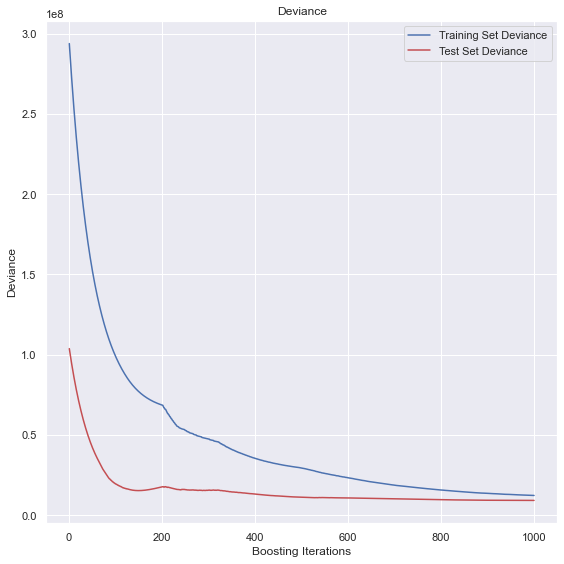

In [66]:
test_score = np.zeros((gbr_params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(gbr.staged_predict(X_test_std)):
    test_score[i] = gbr.loss_(y_test , y_pred)

fig = plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(gbr_params['n_estimators']) + 1, gbr.train_score_, 'b-',label='Training Set Deviance')
plt.plot(np.arange(gbr_params['n_estimators']) + 1, test_score, 'r-',label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

## Decision Tree Regressor

In [67]:
model = DecisionTreeRegressor(random_state=44)
model.fit(X_train_std, y_train)
predictions = model.predict(X_test_std)
r2_score(y_test,predictions)

0.9745484237183686

In [68]:
# Print Coefficient of determination R^2

print("Model Accuracy: %.3f" % model.score(X_test_std, y_test))

# Create the mean squared error

mse = mean_squared_error(y_test, model.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.975
The mean squared error (MSE) on test set: 2690988.8353


## Random Forest Regression

In [72]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=131,min_samples_leaf=.0001)
RForest.fit(X_train_std,y_train)
y_predict=RForest.predict(X_test_std)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8265112058994744

In [73]:
# Print Coefficient of determination R^2

print("Model Accuracy: %.3f" % RForest.score(X_test_std, y_test))

# Create the mean squared error

mse = mean_squared_error(y_test, RForest.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.827
The mean squared error (MSE) on test set: 18342927.0870


## Extra Tree Regression

In [74]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(X_train_std,y_train)
y_predict=ETree.predict(X_test_std)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.809837281322184

In [75]:
# Print Coefficient of determination R^2

print("Model Accuracy: %.3f" % ETree.score(X_test_std, y_test))

# Create the mean squared error

mse = mean_squared_error(y_test, ETree.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.810
The mean squared error (MSE) on test set: 20105856.9889


### Predicting the Dataset with Target set as " Average Cost for two" with Decision Tree Regressor has R^2 score of 97.57 % as highest amongst other Model Predictions.

# Conclusion

#### Predicting the Dataset with Target set as "Price Range" with Random Forest Regression has R^2 score of 97.977 % as highest amongst other Model Predictions.

#### Predicting the Dataset with Target set as " Average Cost for two" with Decision Tree Regressor has R^2 score of 97.57 % as highest amongst other Model Predictions.